In [1]:
#ライブラリの読み込み
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

%precision 3

#可視化用
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

#seed値の固定
np.random.seed(0)

推定統計学(標本から母集団を推定する)

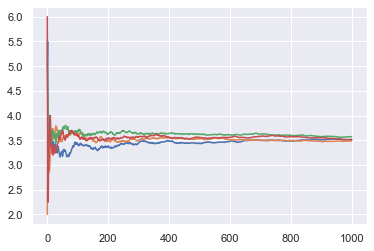

In [2]:
#大数の法則:標本の大きさを大きくすると、標本平均は母平均にい近づく

#計算回数
calc_times = 1000
#サイコロ
sample_array = np.array([1,2,3,4,5,6])
#1から1000までの数字を生成
number_cnt = np.arange(1, calc_times + 1)

#4つのパスを生成
for i in range(4):
    p = np.random.choice(sample_array,calc_times).cumsum()
    plt.plot(p/number_cnt)
    plt.grid(True)

In [3]:
#中心極限定理:標本平均の分布は試行回数(N)を増やすと正規分布に近づく

def function_central_theory(N):
    
    sample_array = np.array([1,2,3,4,5,6])
    number_cnt = np.arange(1, N + 1) * 1.0
    
    mean_array = np.array([])
    
    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array,cum_variables[N-1] / N)
        
    plt.hist(mean_array)
    plt.grid(True)

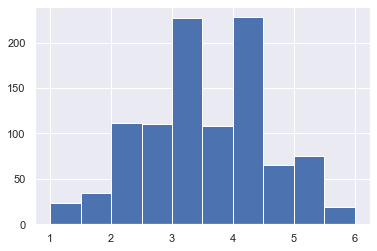

In [5]:
# N=3
function_central_theory(3)

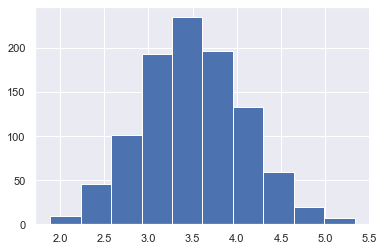

In [6]:
# N=10^3
function_central_theory(10^3)

標本分布

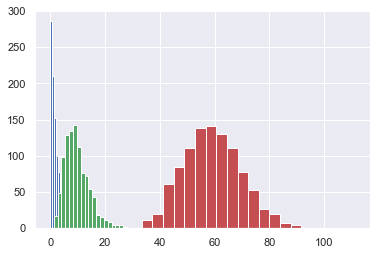

In [7]:
#カイ二乗分布
#確率変数Z1,Z2,…,Znが互いに独立であり、それぞれが標準正規分布N(0,1)に従うとき、
# χ^2 = Z1^2 + Z2^2 + ,…, +Zk^2 のχ^2に従う分布を、自由度k（足される標準正規分布の数）のカイ二乗分布と言う。

#自由度2,10,60に従うカイ二乗分布が生成する乱数のヒストグラム
for df, c in zip([2,10,60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

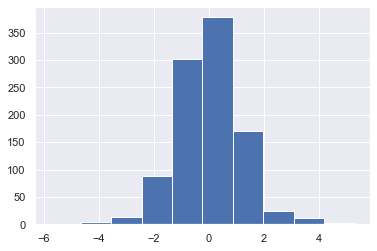

In [8]:
#t分布(ステューデントt分布)
#確率変数Zが標準正規分布N(0,1)、確率変数Wが自由度nのχ2（カイ二乗）分布に従うとき、
# t = Z / (√W/√n) となるtは自由度nのt分布に従います。t分布は自由度が大きくなるにつれ、標準正規分布の形に近づいていきます。

x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

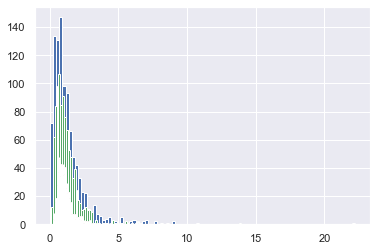

In [11]:
#F分布
#確率変数X,Yについて、Xが自由度nのカイ二乗分布に従うとし、確率変数Yが自由度mのカイ二乗分布に従うとします。また、XとYは互いに独立であると仮定します。
#このとき、 F = (X/n) / (Y/m) と表されるFが従う分布を、F分布といいます。

for df , c in zip([(6,7),(10,10),(20,25)],'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x,100,color=c)
    plt.grid(True)

統計的推定

統計的検定

In [13]:
student_data_math = pd.read_csv('./sample_data/student-mat.csv',sep=';')
student_data_por = pd.read_csv('./sample_data/student-por.csv',sep=';')

#マージする
student_data_merge = pd.merge(student_data_math,student_data_por
                             ,on=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet']
                             ,suffixes=('_math','_por'))

print('G1の数字の成績平均:',student_data_merge.G1_math.mean())
print('G1のポルトガル語の成績平均:',student_data_merge.G1_por.mean())

G1の数字の成績平均: 10.861256544502618
G1のポルトガル語の成績平均: 12.112565445026178


In [15]:
#2つの母平均に有意に差があるかの検定(t検定)
from scipy import stats
t,p = stats.ttest_rel(student_data_merge.G1_math,student_data_merge.G1_por)
print('p値:',p)

p値: 1.653655521710079e-16
